<a href="https://colab.research.google.com/github/AlexAr730/Proyecto-KAGGLE-2025/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.01 - PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


## load `train.csv` data with pandas



In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#Exploracion

In [ ]:
z.shape # Dimensiones del DataFrame:

(692500, 21)

In [ ]:
z.info() # Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [ ]:
print("Cantidad de estudiantes por programa académico:") # Cantidad de estudiantes por programa académico
print(z["ESTU_PRGM_ACADEMICO"].value_counts().head(10))  # Los 10 programas más comunes

Cantidad de estudiantes por programa académico:
ESTU_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
ADMINISTRACIÓN DE EMPRESAS    24777
INGENIERIA CIVIL              19487
MEDICINA                      18099
PSICOLOGÍA                    17377
INGENIERIA DE SISTEMAS        17150
Name: count, dtype: int64


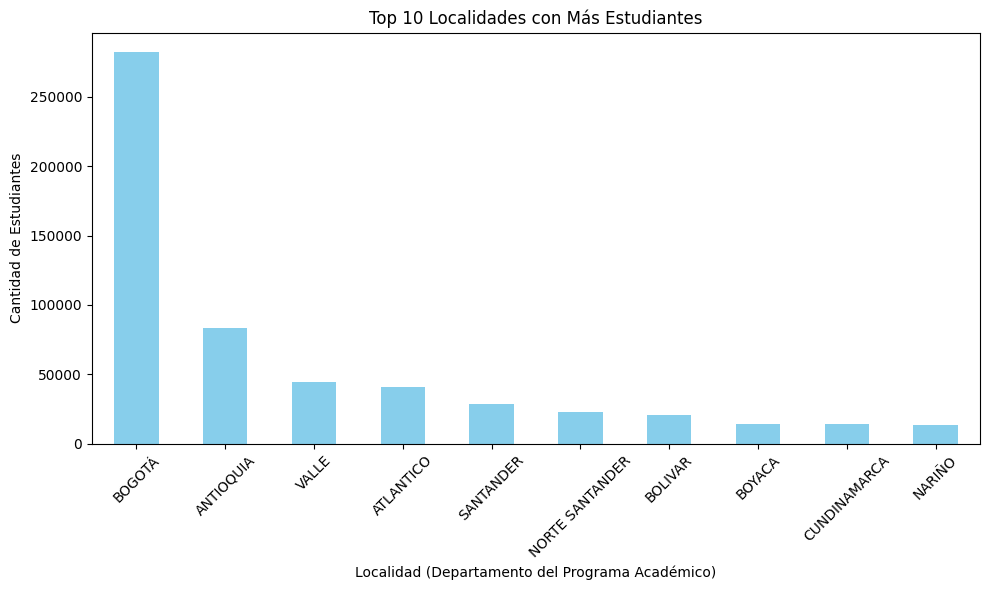

In [ ]:
import matplotlib.pyplot as plt

# Top 10 departamentos por cantidad de estudiantes
z["ESTU_PRGM_DEPARTAMENTO"].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Localidades con Más Estudiantes")
plt.xlabel("Localidad (Departamento del Programa Académico)")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
